In [23]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
song_data = pd.read_csv("Data/Most_Streamed_Spotify_Songs_2024.csv", encoding = 'unicode_escape')
song_data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [4]:
#Split dates in Release Date Column 
#Split Month to Month Column 
#Split Year Column 

#Converting Release Date Column to DateTime Format 
song_data['Release Date']=pd.to_datetime(song_data['Release Date'])
song_data.dtypes

#Extracting Month and Year
song_data['Month']= song_data['Release Date'].dt.month
song_data['Year']= song_data['Release Date'].dt.year
song_data.head(3)


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Month,Year
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0,4,2024
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1,5,2024
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0,3,2024


In [5]:
#Create bins for seasons and update Df with Season Name 

bins= [0,3,6,9,12]
season_names = ["Winter","Spring","Summmer","Fall"]
song_data["Seasons"]= pd.cut(song_data["Month"],bins,labels=season_names, include_lowest=True)
song_data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Month,Year,Seasons
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0,4,2024,Spring
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1,5,2024,Spring
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0,3,2024,Winter
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0,1,2023,Winter
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,105.0,"4,493,884","7,006","207,179","457,017",NaN,1,5,2024,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1,9,2017,Summmer
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,NaN,NaN,NaN,"193,590",NaN,0,7,2018,Summmer
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1,2,2020,Winter
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0,11,2016,Fall


In [7]:
song_data.dtypes

Track                                 object
Album Name                            object
Artist                                object
Release Date                  datetime64[ns]
ISRC                                  object
All Time Rank                         object
Track Score                          float64
Spotify Streams                      float64
Spotify Playlist Count               float64
Spotify Playlist Reach                object
Spotify Popularity                   float64
YouTube Views                         object
YouTube Likes                         object
TikTok Posts                          object
TikTok Likes                          object
TikTok Views                          object
YouTube Playlist Reach                object
Apple Music Playlist Count           float64
AirPlay Spins                         object
SiriusXM Spins                        object
Deezer Playlist Count                float64
Deezer Playlist Reach                float64
Amazon Pla

In [32]:
#Convert columns to string, replace commas 
columns_to_convert = ['Spotify Streams', 'All Time Rank', 'Spotify Playlist Count','Spotify Playlist Reach','Deezer Playlist Reach',
                      'Amazon Playlist Count', 'Pandora Track Stations', 'Pandora Streams','Soundcloud Streams','Shazam Counts']
for column in columns_to_convert:
    song_data[column] = song_data[column].astype(str).str.replace(',', '').astype(float)

# Set pandas display options to expand numbers instead of using scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

song_data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Month,Year,Seasons
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1.00,725.40,390470936.00,30716.00,196631588.00,...,114.00,18004655.00,22931.00,4818457.00,2669262.00,NaN,0,4,2024,Spring
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2.00,545.90,323703884.00,28113.00,174597137.00,...,111.00,7780028.00,28444.00,6623075.00,1118279.00,NaN,1,5,2024,Spring
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3.00,538.40,601309283.00,54331.00,211607669.00,...,172.00,5022621.00,5639.00,7208651.00,5285340.00,NaN,0,3,2024,Winter
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4.00,444.90,2031280633.00,269802.00,136569078.00,...,210.00,190260277.00,203384.00,NaN,11822942.00,NaN,0,1,2023,Winter
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5.00,423.30,107034922.00,7223.00,151469874.00,...,105.00,4493884.00,7006.00,207179.00,457017.00,NaN,1,5,2024,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585.00,19.40,305049963.00,65770.00,5103054.00,...,NaN,20104066.00,13184.00,50633006.00,656337.00,NaN,1,9,2017,Summmer
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575.00,19.40,52282360.00,4602.00,1449767.00,...,NaN,NaN,NaN,NaN,193590.00,NaN,0,7,2018,Summmer
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571.00,19.40,189972685.00,72066.00,6704802.00,...,6.00,84426740.00,28999.00,NaN,1135998.00,NaN,1,2,2020,Winter
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591.00,19.40,145467020.00,14037.00,7387064.00,...,7.00,6817840.00,NaN,NaN,448292.00,NaN,0,11,2016,Fall


In [20]:
song_data.dtypes

Track                                 object
Album Name                            object
Artist                                object
Release Date                  datetime64[ns]
ISRC                                  object
All Time Rank                        float64
Track Score                          float64
Spotify Streams                      float64
Spotify Playlist Count               float64
Spotify Playlist Reach               float64
Spotify Popularity                   float64
YouTube Views                         object
YouTube Likes                         object
TikTok Posts                          object
TikTok Likes                          object
TikTok Views                          object
YouTube Playlist Reach                object
Apple Music Playlist Count           float64
AirPlay Spins                         object
SiriusXM Spins                        object
Deezer Playlist Count                float64
Deezer Playlist Reach                float64
Amazon Pla

In [21]:
# Calculate averages by month, season, and year

monthly_stats = song_data.groupby('Month')[['Spotify Streams', 'Track Score']].mean()
seasonal_stats = song_data.groupby('Seasons')[['Spotify Streams', 'Track Score']].mean()
yearly_stats = song_data.groupby('Year')[['Spotify Streams', 'Track Score']].mean()

print(monthly_stats)
print(seasonal_stats)
print(yearly_stats)

       Spotify Streams  Track Score
Month                              
1         737811705.79        39.19
2         372504221.28        40.15
3         392815676.32        46.06
4         353344447.75        46.54
5         354440741.39        45.98
6         395811356.17        41.78
7         483547155.49        41.28
8         460266424.55        42.30
9         422175366.98        39.35
10        443678177.58        38.03
11        510180646.87        38.41
12        385848427.02        40.41
         Spotify Streams  Track Score
Seasons                              
Winter      521557041.43        41.73
Spring      366106206.13        44.91
Summmer     454902966.63        40.96
Fall        451097684.36        38.80
      Spotify Streams  Track Score
Year                              
1987    1879386440.00        21.50
1991    2021910364.00        19.60
1994    1810649765.00        31.50
1998     178339925.00        20.80
1999    1405353677.00        22.20
2000    1921766550.00  

/var/folders/14/kd5dvlbj2t7dp4cyd4zx18hh0000gn/T/ipykernel_44199/2794197071.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_stats = song_data.groupby('Seasons')[['Spotify Streams', 'Track Score']].mean()


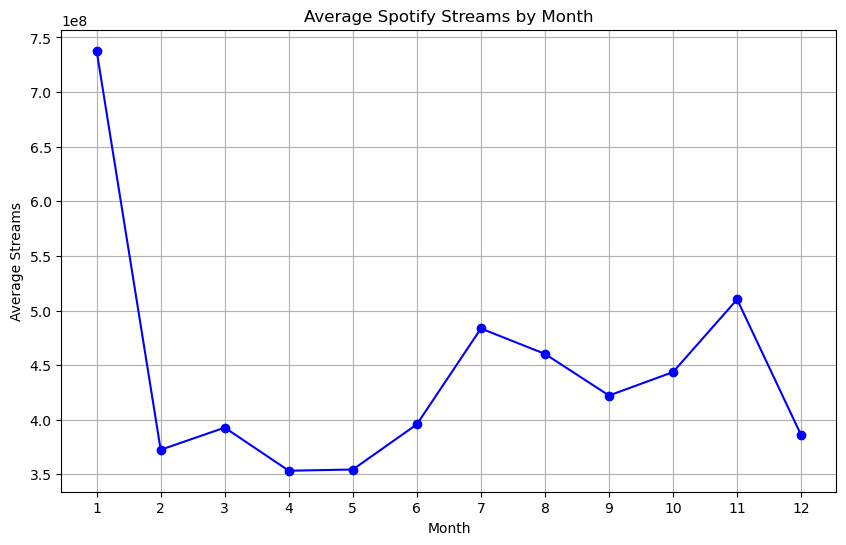

In [25]:
# Monthly Average Spotify Streams

monthly_avg = song_data.groupby('Month')['Spotify Streams'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', color='blue')
plt.title('Average Spotify Streams by Month')
plt.xlabel('Month')
plt.ylabel('Average Streams')
plt.grid(True)
plt.xticks(monthly_avg.index)  
plt.show()

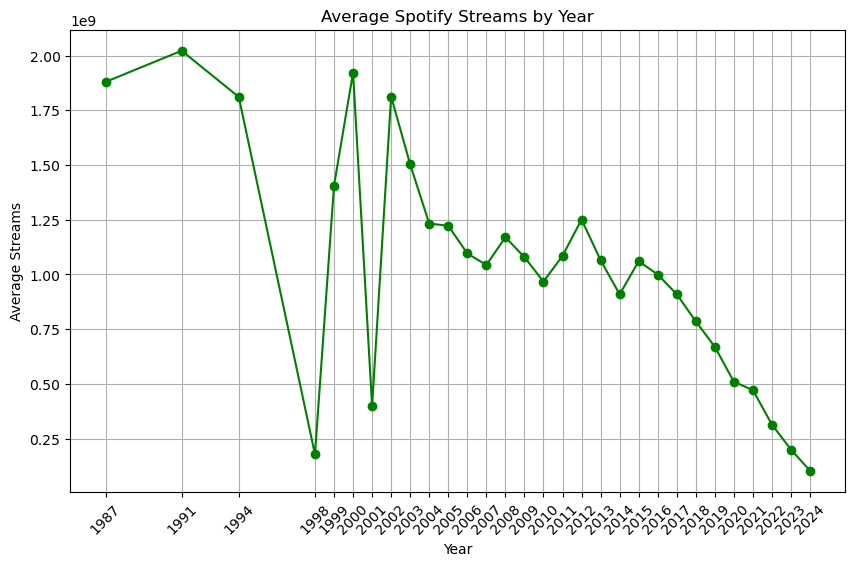

In [26]:
# Yearly Average Spotify Streams
yearly_avg = song_data.groupby('Year')['Spotify Streams'].mean()
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-', color='green')
plt.title('Average Spotify Streams by Year')
plt.xlabel('Year')
plt.ylabel('Average Streams')
plt.grid(True)
plt.xticks(yearly_avg.index, rotation=45) 
plt.show()

/var/folders/14/kd5dvlbj2t7dp4cyd4zx18hh0000gn/T/ipykernel_44199/1673657968.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_avg = song_data.groupby('Seasons')['Track Score'].mean().sort_values()


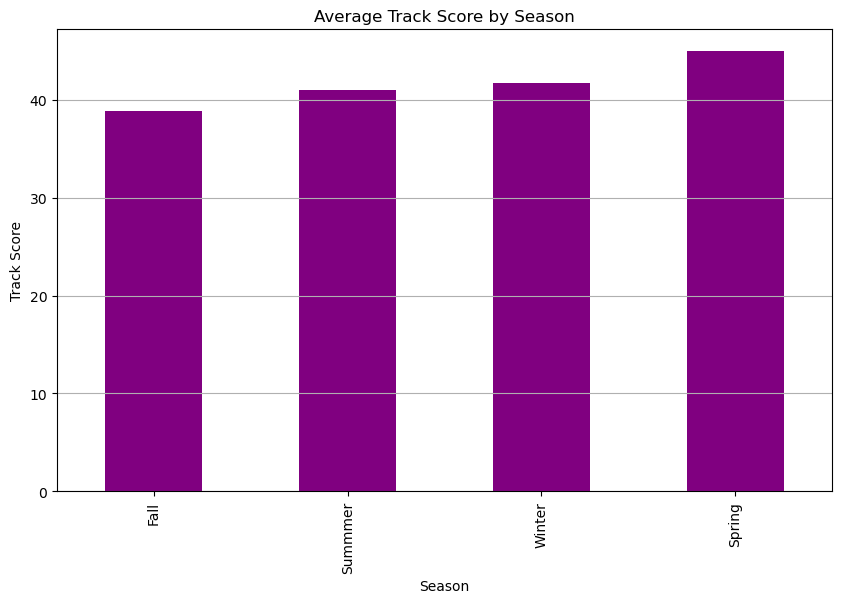

In [28]:
# Bar Graph for Seasonal Differences in Track Scores

seasonal_avg = song_data.groupby('Seasons')['Track Score'].mean().sort_values()
plt.figure(figsize=(10, 6))
seasonal_avg.plot(kind='bar', color='purple')
plt.title('Average Track Score by Season')
plt.xlabel('Season')
plt.ylabel('Track Score')
plt.grid(True, axis='y')
plt.show()

In [4]:
print(song_data.columns.values)

['Track' 'Album Name' 'Artist' 'Release Date' 'ISRC' 'All Time Rank'
 'Track Score' 'Spotify Streams' 'Spotify Playlist Count'
 'Spotify Playlist Reach' 'Spotify Popularity' 'YouTube Views'
 'YouTube Likes' 'TikTok Posts' 'TikTok Likes' 'TikTok Views'
 'YouTube Playlist Reach' 'Apple Music Playlist Count' 'AirPlay Spins'
 'SiriusXM Spins' 'Deezer Playlist Count' 'Deezer Playlist Reach'
 'Amazon Playlist Count' 'Pandora Streams' 'Pandora Track Stations'
 'Soundcloud Streams' 'Shazam Counts' 'TIDAL Popularity' 'Explicit Track']
